### **Red Wine Quality for Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [ ]:
wine_df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
wine_df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.shape

(1599, 12)

In [ ]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

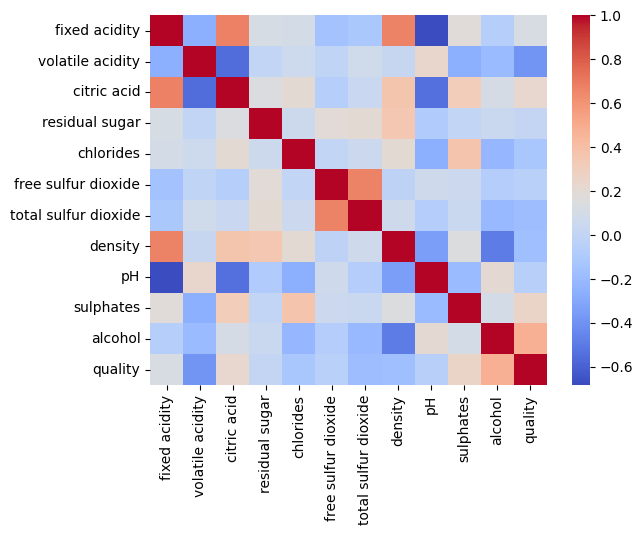

In [ ]:
corr = wine_df.corr()
sns.heatmap(corr, cmap="coolwarm");

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

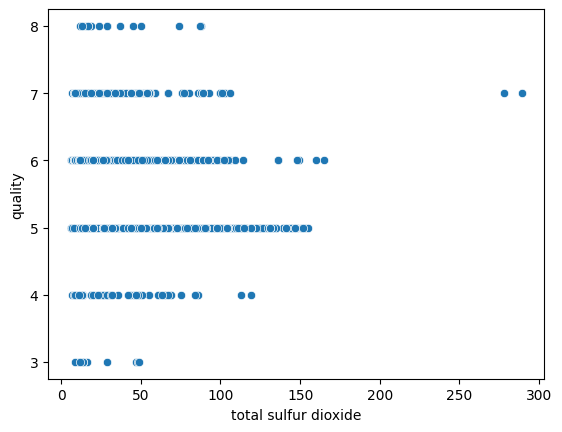

In [ ]:
sns.scatterplot(data=wine_df,x="total sulfur dioxide",y="quality")

In [ ]:
wine_df[wine_df["total sulfur dioxide"]>250]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1079            7.9               0.3         0.68             8.3       0.05   
1081            7.9               0.3         0.68             8.3       0.05   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   

      alcohol  quality  
1079     12.3        7  
1081     12.3        7

In [ ]:
wine_df = wine_df[wine_df["total sulfur dioxide"]<250]

In [ ]:
wine_df.corr()["quality"].sort_values()

volatile acidity       -0.388955
total sulfur dioxide   -0.207581
density                -0.171592
chlorides              -0.127500
free sulfur dioxide    -0.055279
pH                     -0.053828
residual sugar          0.005146
fixed acidity           0.124790
citric acid             0.222943
sulphates               0.253822
alcohol                 0.474208
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='density', ylabel='quality'>

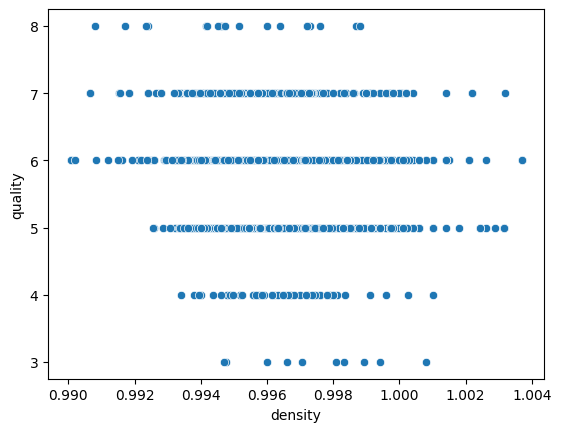

In [ ]:
sns.scatterplot(data=wine_df,x="density",y="quality")

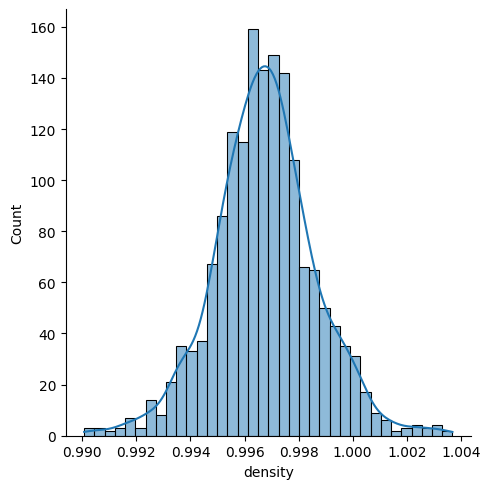

In [ ]:
sns.displot(data=wine_df,x="density", kde=True)

In [ ]:
wine_df.corr()["quality"].sort_values()

volatile acidity       -0.388955
total sulfur dioxide   -0.207581
density                -0.171592
chlorides              -0.127500
free sulfur dioxide    -0.055279
pH                     -0.053828
residual sugar          0.005146
fixed acidity           0.124790
citric acid             0.222943
sulphates               0.253822
alcohol                 0.474208
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='residual sugar', ylabel='quality'>

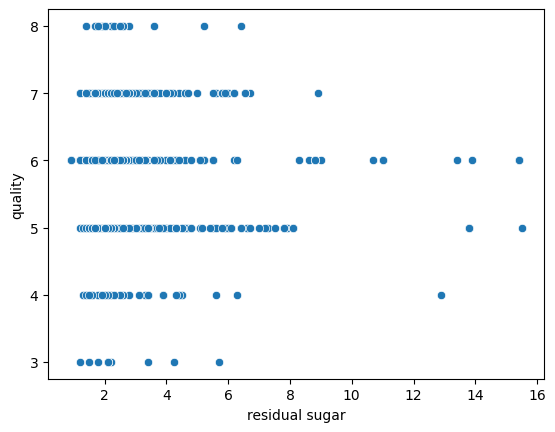

In [ ]:
sns.scatterplot(data=wine_df,x="residual sugar",y="quality")

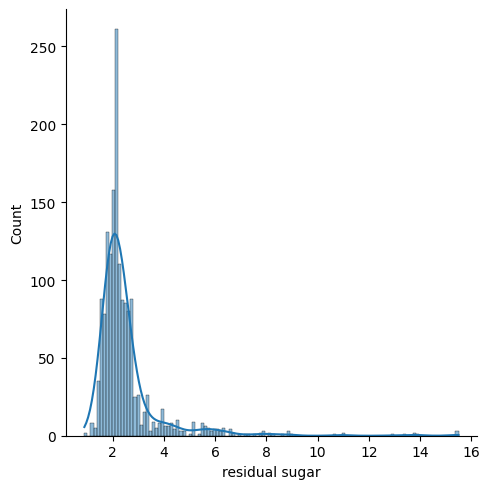

In [ ]:
sns.displot(data=wine_df,x="residual sugar", kde=True)

In [ ]:
wine_df = wine_df[wine_df["residual sugar"]<8]

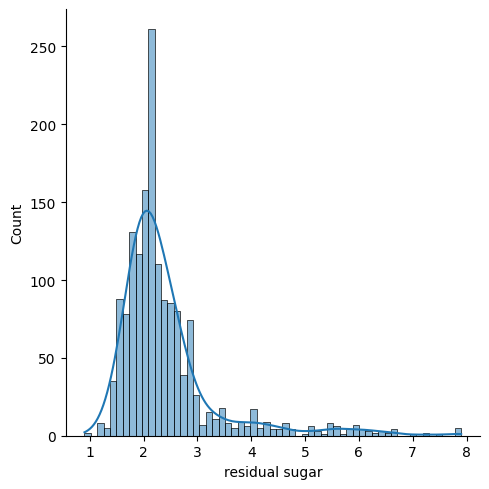

In [ ]:
sns.displot(data=wine_df,x="residual sugar", kde=True)

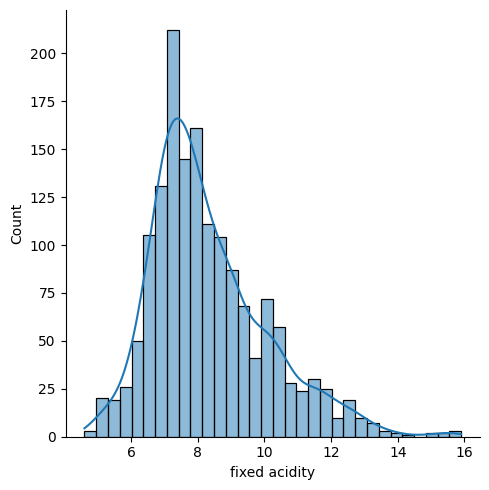

In [ ]:
sns.displot(data=wine_df,x="fixed acidity", kde=True)

<Axes: xlabel='fixed acidity', ylabel='quality'>

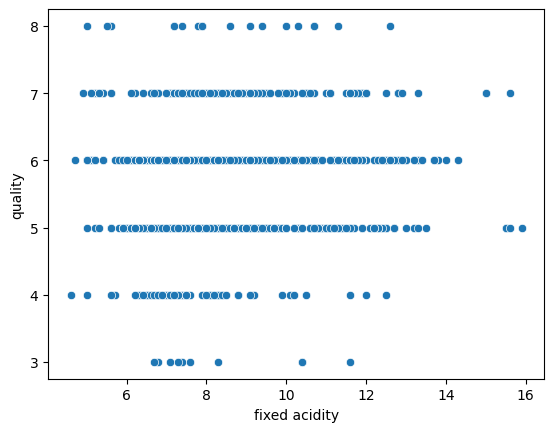

In [ ]:
sns.scatterplot(data=wine_df,x="fixed acidity",y="quality")

In [ ]:
wine_df = wine_df[wine_df["fixed acidity"]<14.3]

In [ ]:
wine_df.corr()["quality"].sort_values()

volatile acidity       -0.389521
total sulfur dioxide   -0.209901
density                -0.184077
chlorides              -0.127796
free sulfur dioxide    -0.058227
pH                     -0.054923
residual sugar          0.012064
fixed acidity           0.125869
citric acid             0.224226
sulphates               0.254333
alcohol                 0.488838
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='alcohol', ylabel='quality'>

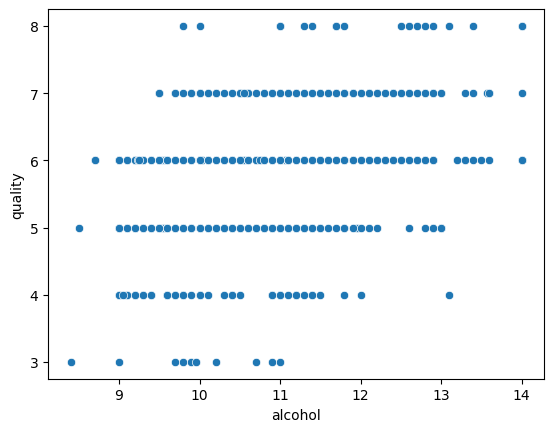

In [ ]:
sns.scatterplot(data=wine_df,x="alcohol",y="quality")

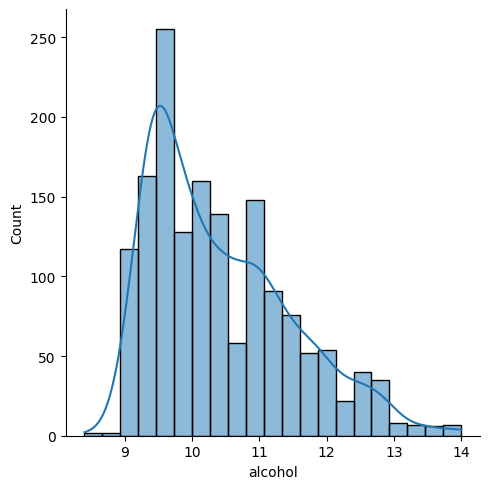

In [ ]:
sns.displot(data=wine_df,x="alcohol", kde=True)

In [ ]:
wine_df = wine_df[wine_df["alcohol"]>9]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = wine_df.drop("quality",axis=1)
y=wine_df["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1038            8.7             0.410         0.41             6.2      0.078   
395            12.0             0.370         0.76             4.2      0.066   
300             7.5             0.530         0.06             2.6      0.086   
1534            6.6             0.560         0.14             2.4      0.064   
801             8.6             0.550         0.09             3.3      0.068   
...             ...               ...          ...             ...        ...   
1180            8.2             0.350         0.33             2.4      0.076   
1346            6.1             0.590         0.01             2.1      0.056   
902             7.4             0.635         0.10             2.4      0.080   
1518            7.4             0.470         0.46             2.2      0.114   
1176            6.5             0.880         0.03             5.6      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1038                 25.0                  42.0  0.99530  3.24       0.77   
395                   7.0                  38.0  1.00040  3.22       0.60   
300                  20.0                  44.0  0.99650  3.38       0.59   
1534                 13.0                  29.0  0.99397  3.42       0.62   
801                   8.0                  17.0  0.99735  3.23       0.44   
...                   ...                   ...      ...   ...        ...   
1180                 11.0                  47.0  0.99599  3.27       0.81   
1346                  5.0                  13.0  0.99472  3.52       0.56   
902                  16.0                  33.0  0.99736  3.58       0.69   
1518                  7.0                  20.0  0.99647  3.32       0.63   
1176                 23.0                  47.0  0.99572  3.58       0.50   

      alcohol  
1038     12.6  
395      13.0  
300      10.7  
1534     11.7  
801      10.0  
...       ...  
1180     11.0  
1346     11.4  
902      10.8  
1518     10.5  
1176     11.2  

[1076 rows x 11 columns]

<Axes: xlabel='quality', ylabel='Count'>

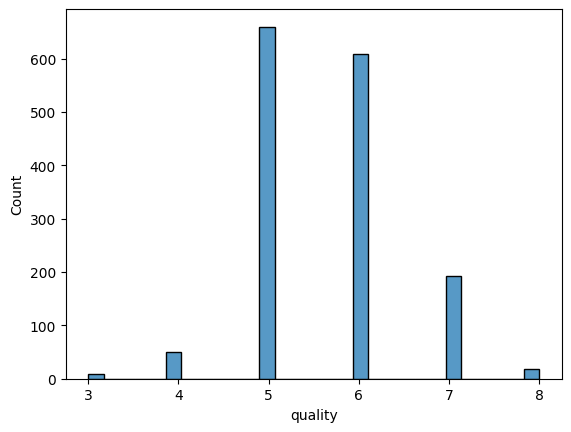

In [ ]:
sns.histplot(data=wine_df,x="quality")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(include_bias=False)
polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)
print(poly_features.shape)

(1538, 77)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,test_predictions)))

0.6126630503464707


In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
model_two = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],max_iter=1000000)

In [ ]:
model_two.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [ ]:
model_two.l1_ratio_

0.95

In [ ]:
test_pred = model_two.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,test_pred))

0.6132181142956027

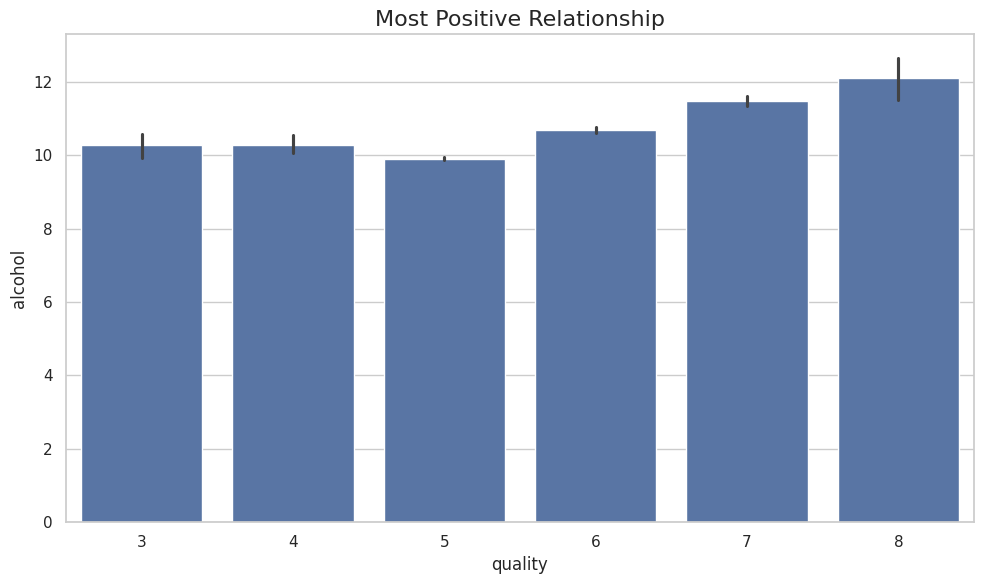

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="quality", y="alcohol", data=wine_df)
plt.title("Most Positive Relationship", fontsize=16)
ax.set_xlabel("quality", fontsize=12)
ax.set_ylabel("alcohol", fontsize=12)
plt.tight_layout()
plt.show()

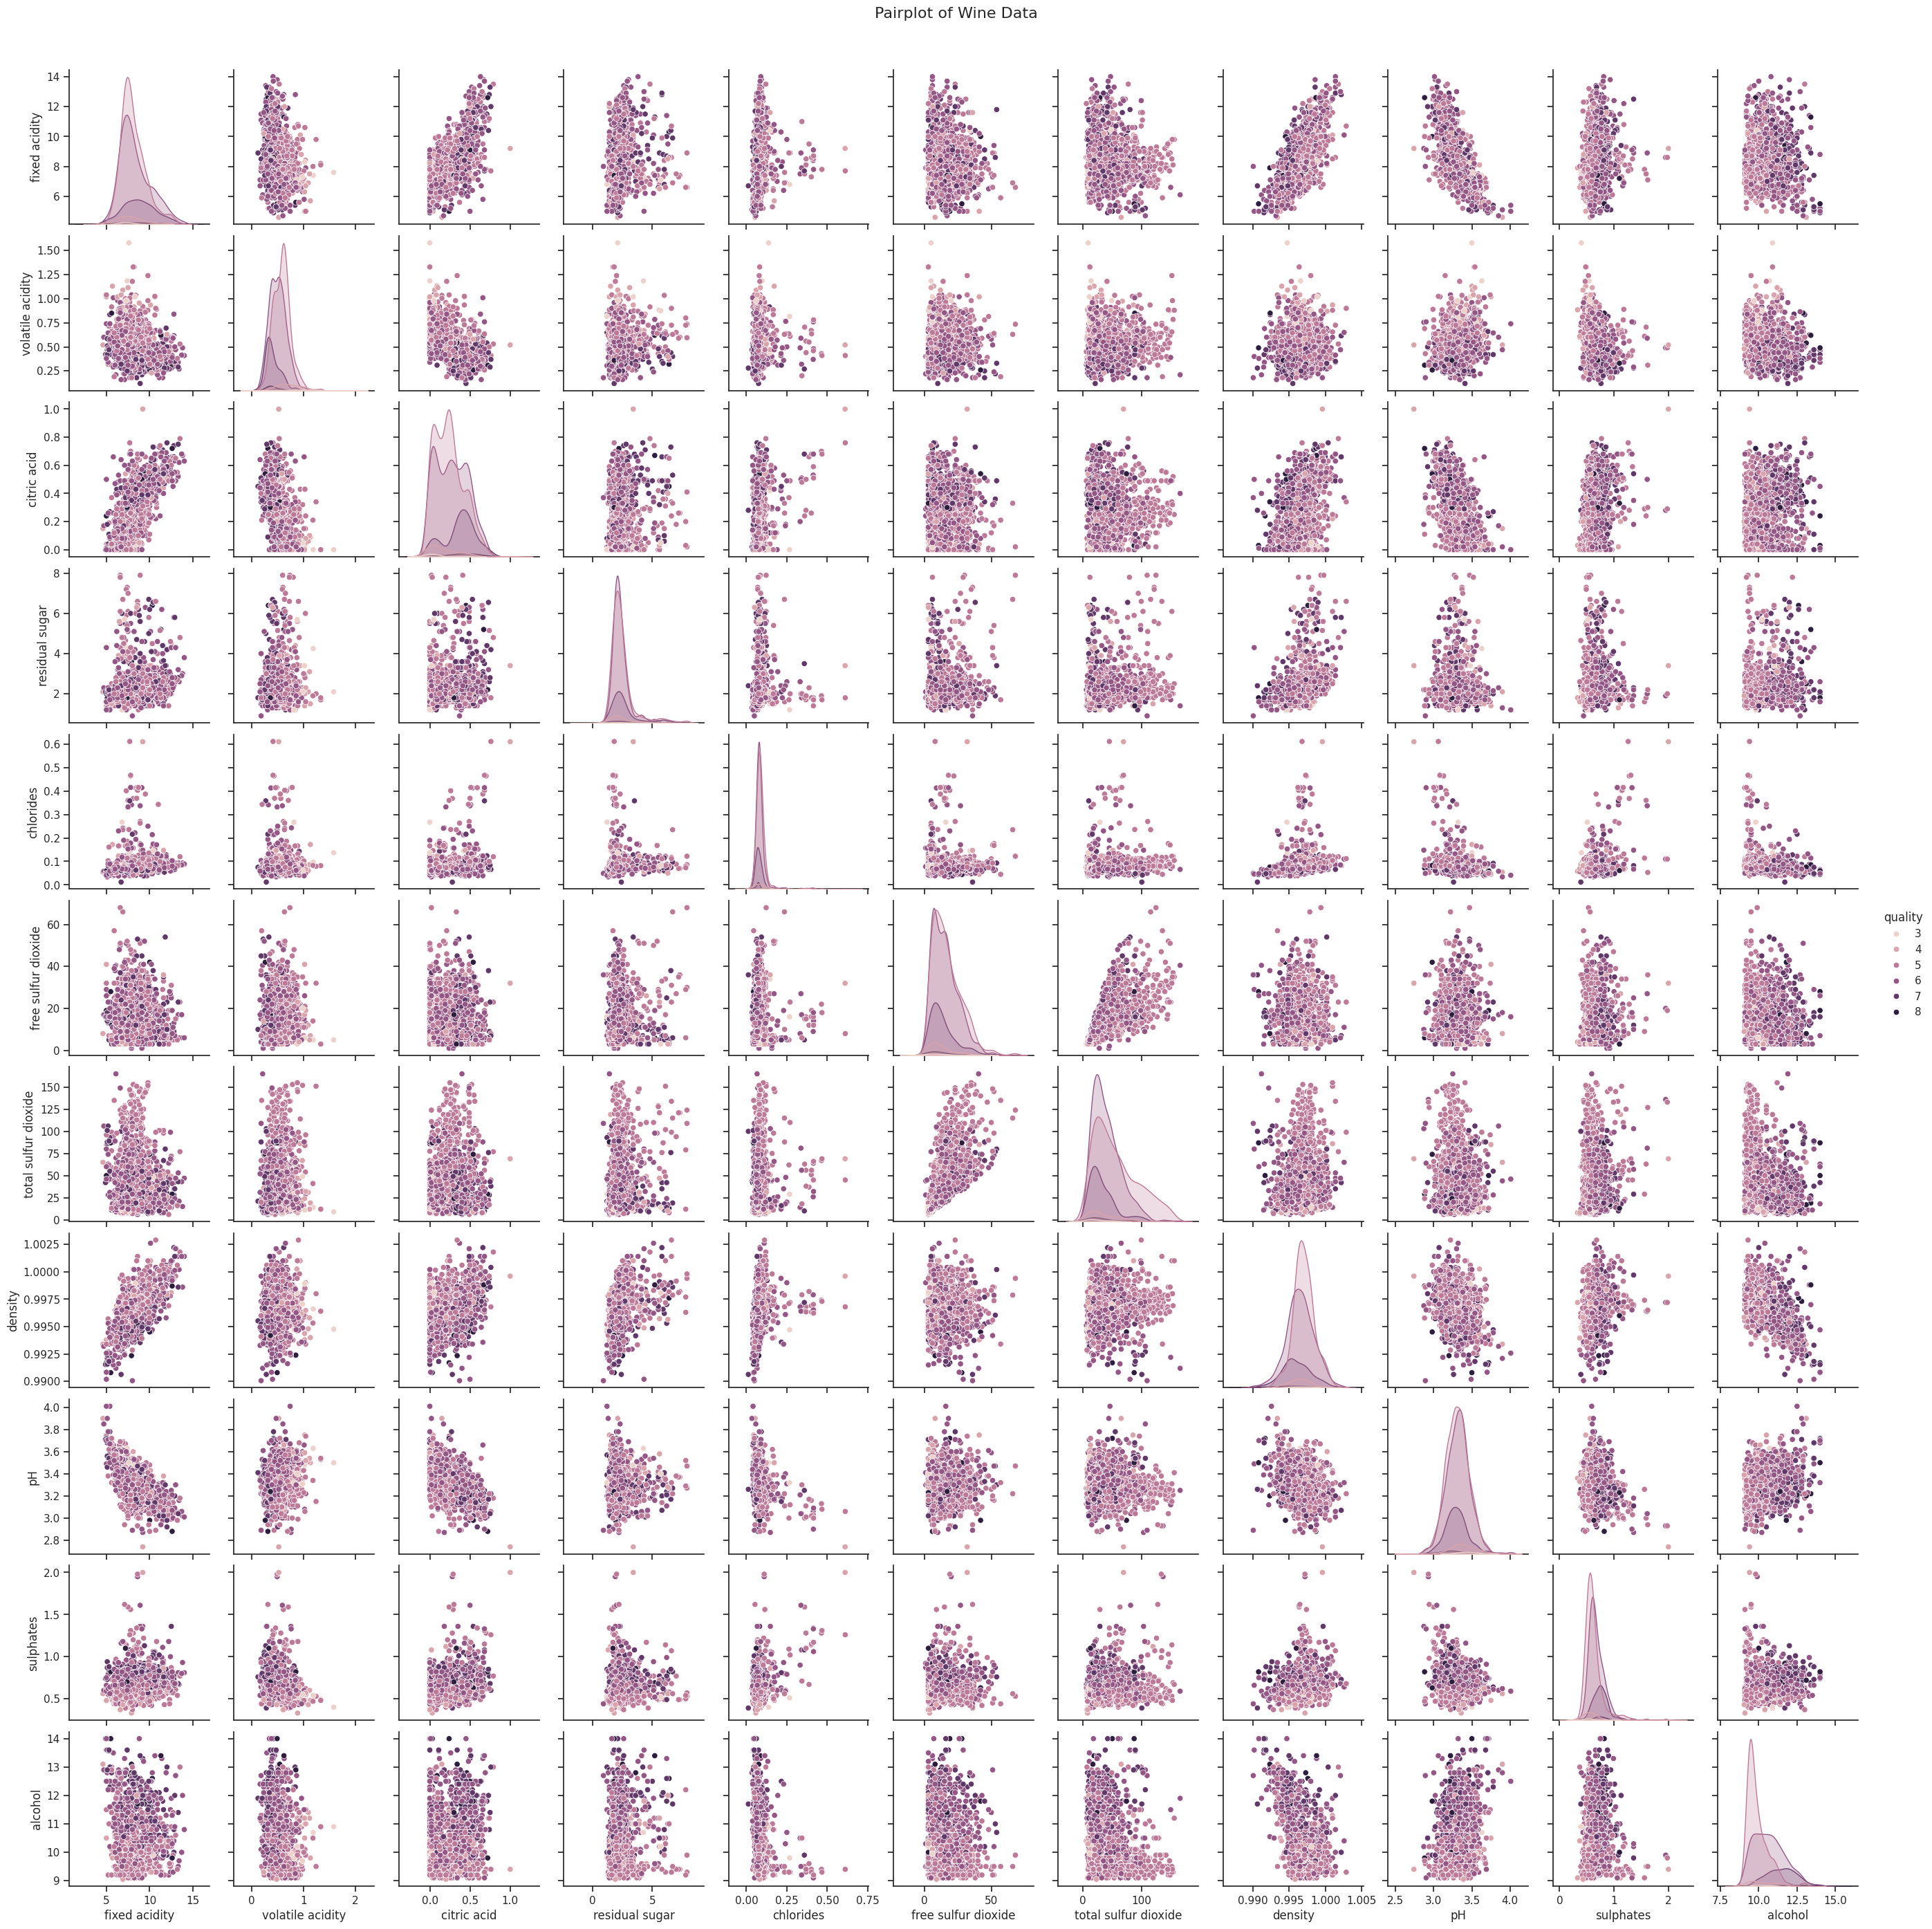

In [ ]:
# Set the style and create a pairplot
sns.set(style="ticks")
sns.pairplot(wine_df, diag_kind="kde", markers="o", hue="quality")

plt.suptitle("Pairplot of Wine Data", y=1.02, fontsize=16)
plt.show()

In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Check for duplicates across all columns
duplicated = wine_df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
wine_df[duplicated]

Number of duplicated instances: 225


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[225 rows x 12 columns]

In [ ]:
wine_df = wine_df.drop_duplicates()

In [ ]:
# Make sure there is no more duplicates.
duplicated = wine_df.duplicated()

print("Number of duplicated instances:", duplicated.sum())
wine_df[duplicated]

Number of duplicated instances: 0


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [ ]:
wine_df["quality"] = np.where(wine_df["quality"] >= 7, 1, 0)

In [ ]:
wine_df['quality'].value_counts()

quality
0    1134
1     179
Name: count, dtype: int64

In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
fig = px.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion before SMOTE Upsampling<b>')
fig.show()

In [ ]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(pd.Series(y_train).value_counts())

quality
0    852
1    852
Name: count, dtype: int64


In [ ]:
fig = px.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion after SMOTE Upsampling<b>')
fig.show()

In [ ]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       282
           1       0.48      0.53      0.51        47

    accuracy                           0.85       329
   macro avg       0.70      0.72      0.71       329
weighted avg       0.86      0.85      0.85       329



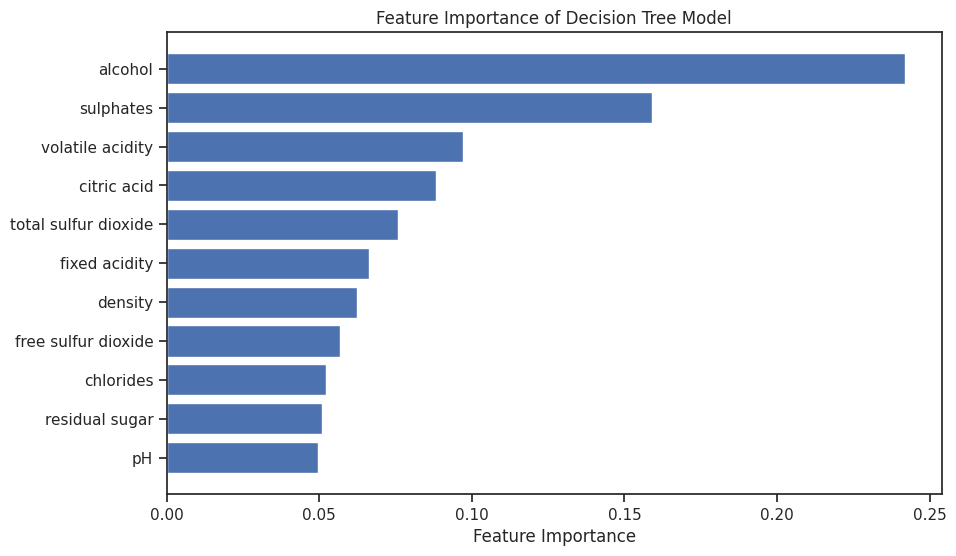

In [ ]:
# Get feature importances
feature_importance = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Decision Tree Model')
plt.show()

In [ ]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")

Cross-validation scores: [0.82575758 0.8030303  0.77272727 0.85496183 0.83206107 0.82442748
 0.82442748 0.83206107 0.8778626  0.80152672]
Mean accuracy: 0.82
Standard deviation: 0.03


In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       282
           1       0.52      0.60      0.55        47

    accuracy                           0.86       329
   macro avg       0.72      0.75      0.74       329
weighted avg       0.87      0.86      0.87       329



In [ ]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")

Cross-validation scores: [0.92424242 0.86363636 0.90151515 0.85496183 0.86259542 0.8778626
 0.89312977 0.88549618 0.89312977 0.8778626 ]
Mean accuracy: 0.88
Standard deviation: 0.02


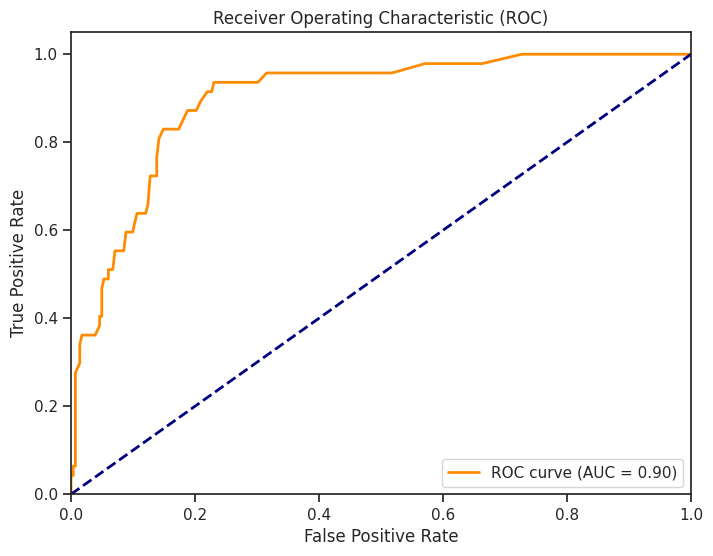

In [ ]:
# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Accuracy: 0.9307521131619805
